In [1]:
import requests

import numpy as np
import matplotlib.pyplot as plt

In [12]:
requests.get('http://127.0.0.1:8001/status').json()

{'status': 'OK'}

In [18]:
requests.get('http://127.0.0.1:8001/experiment').json()

[{'experiment_id': '5184c615-c82e-4cda-9410-f1aceb4730dc'}]

In [18]:
test_data = {
    'a': {'type': 'log', 'parameters': dict(lower=0.01, upper=1.0)},
    'a': {'type': 'log', 'parameters': dict(lower=0.01, upper=1.0)},
    'a': {'type': 'log', 'parameters': dict(lower=0.01, upper=1.0)},
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
new_experiment_id

'79c2fd42-dd8a-4310-bacb-f5949186eedd'

In [19]:
requests.get(f'http://127.0.0.1:8001/experiment/41444{new_experiment_id}').json()

{'status': 'Experiment with such ID not Found'}

In [22]:
requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()

{'a': 0.0931454865796409}

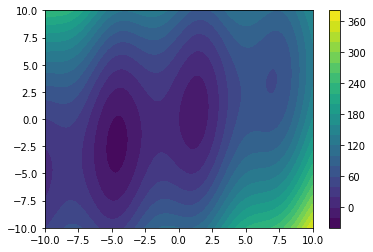

In [14]:
def f(a, b):
    return a**2 + b**2 - a*b - 20*np.sin(a) + 5*a

a = np.linspace(-10, 10, 100)
b = np.linspace(-10, 10, 100)

x, y = np.meshgrid(a, b)

z = f(x, y)

plt.contourf(x, y, z, levels=20)
plt.colorbar()

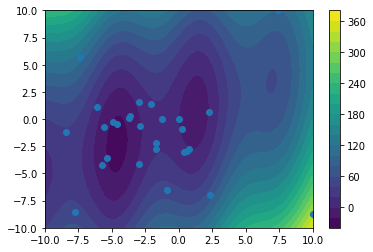

{'a': -4.90994139222683, 'b': -0.2567890955357321}
-21.24805930413202
{'status': 'OK'}


In [ ]:
from IPython.display import clear_output
test_data = {
    'a': {'type': 'scalar', 'parameters': dict(lower=-10, upper=10)},
    'b': {'type': 'scalar', 'parameters': dict(lower=-10, upper=10)},
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
new_experiment_id

asked = [[], []]
for i in range(30):
    plt.contourf(x, y, z, levels=20)
    plt.colorbar()
    asked_point = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()
    asked[0].append(asked_point['a'])
    asked[1].append(asked_point['b'])
    plt.scatter(*asked)
    plt.show()
    print(asked_point)
    f_a = f(**asked_point)
    print(f_a)
    tell_info = {
        'point': asked_point,
        'value': f_a
    }
    tell_resp = requests.post(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/tell', json=tell_info).json()
    print(tell_resp)
    clear_output(wait=True)